In [24]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

#sequetial model is used to build the model layer by layer
model = tf.keras.models.Sequential()

#input layer
model.add(tf.keras.layers.Flatten())

# 2 hideen layers
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

# https://www.tutorialspoint.com/keras/keras_model_compilation.htm for the compile parameters
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])


model.fit(X_train, y_train, epochs = 3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 11s 177us/sample - loss: 0.2597 - accuracy: 0.9235
Epoch 2/3
60000/60000 [==============================] - 9s 143us/sample - loss: 0.1068 - accuracy: 0.9664
Epoch 3/3
60000/60000 [==============================] - 9s 142us/sample - loss: 0.0716 - accuracy: 0.9775


In [28]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 155us/sample - loss: 0.0992 - accuracy: 0.9688


[0.09923351825829595, 0.9688]

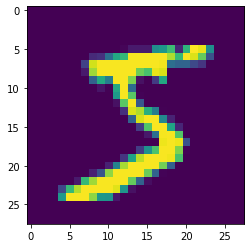

In [17]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.show()

In [31]:
model.save('num_reader.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: num_reader.model\assets


In [46]:
#to load the model
new_model = tf.keras.models.load_model('num_reader.model')

In [52]:
predictions = model.predict(X_test)

In [53]:
predictions

array([[1.24833477e-10, 3.49664759e-08, 8.95660924e-06, ...,
        9.99977708e-01, 1.20103250e-09, 7.45000550e-09],
       [1.96486880e-08, 1.05036750e-04, 9.99884844e-01, ...,
        3.56636121e-09, 2.24129644e-06, 1.01910487e-10],
       [4.81261004e-08, 9.99643803e-01, 2.24100950e-05, ...,
        8.20657297e-05, 2.26664648e-04, 2.16231888e-06],
       ...,
       [9.08191389e-09, 1.43516035e-08, 1.45062771e-07, ...,
        1.26700911e-06, 1.48042582e-05, 5.03765012e-04],
       [5.10126426e-07, 7.98704463e-08, 1.20359314e-08, ...,
        9.76884849e-08, 2.65459414e-04, 3.39709914e-07],
       [8.32156388e-08, 3.57432917e-10, 6.10801791e-08, ...,
        2.84303375e-12, 5.59770363e-08, 1.49635393e-09]], dtype=float32)

In [54]:
import numpy as np

np.argmax(predictions[0])

7

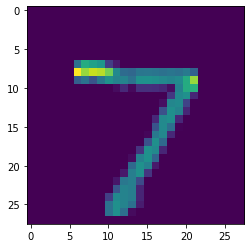

In [55]:
plt.imshow(X_test[0])
plt.show()